In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pylab

In [2]:

            
def action(eps,n_arms,Q):
    armIndex = 0
    randomE = np.random.random()
    if (randomE < eps):
        armIndex = np.random.randint(0,n_arms)
    else:
        armIndex= np.argmax(Q) 
    return armIndex
       
def reward(q, action):
    mu = q[action] 
    reward = np.random.normal(mu,1,1)
    return reward
        
def update_Q_constantStepSize(action, reward, Q):
    alpha = 0.1
    Q[action] += alpha * (reward - Q[action])
    
def update_q(q, n_arms):                   #for non-stationary
    q = q + np.random.normal(0,0.01,n_arms)
    
def update_Q_incrementallyComputed(action, reward, k, Q):
    k[action] += 1
    Q[action] += (1./k[action]) * (reward - Q[action])
            

In [3]:
# Question 1 fig 2.3 for stationary


n_arms = 10

n_exp = 2000
n_Steps   = 1000

eps = 0.1
m=0
Reward_Avg = np.zeros((n_Steps,1))
Action_Sum = np.zeros((n_Steps, n_arms))
Optimal_Action = np.zeros((n_Steps,1))
Optimal_Action_Sum = np.zeros((n_Steps,1))
Optimal_Action_Index = np.zeros((n_exp,1))
Action_Record = np.zeros((n_exp,n_Steps))
for i in range(n_exp):
    q= np.random.normal(0,1,n_arms)
    #q= np.ones(n_arms,dtype = float)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype=float)
    Action_History = []
    Reward_History = []   
    for ts in range(n_Steps):
        Action = action(eps, n_arms, Q)
        Reward = reward(q, Action)
        if (m==0):
            update_Q_constantStepSize(Action, Reward, Q)
        else:
            update_Q_incrementallyComputed(Action, Reward, k, Q)
        update_q(q, n_arms)  
        Action_History.append(Action)
        Reward_History.append(Reward)



    Action_History1 = np.array(Action_History)   
    Reward_History1 = np.array(Reward_History) 
    Reward_Avg += Reward_History1

    Action_Record[i,:] = Action_History1 
    Optimal_Action_Index[i] = np.argmax(q)  
Reward_Avg /= np.float(n_exp)

for i in range(n_Steps):
    x = Action_Record[:,i] 
    count = 0
    for j in range(n_Steps):
        if (x[j]==Optimal_Action_Index[j]):
            count = count+1
    Optimal_Action[i] = count
Optimal_Action_Percentage = (Optimal_Action/np.float(n_exp))*100



n_arms = 10

n_exp = 2000
n_Steps   = 1000

eps = 0.1
m=1
Reward_Avg1 = np.zeros((n_Steps,1))
Action_Sum = np.zeros((n_Steps, n_arms))
Optimal_Action = np.zeros((n_Steps,1))
Optimal_Action_Sum = np.zeros((n_Steps,1))
Optimal_Action_Index = np.zeros((n_exp,1))
Action_Record = np.zeros((n_exp,n_Steps))
for i in range(n_exp):
    q= np.random.normal(0,1,n_arms)
    #q= np.ones(n_arms,dtype = float)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype=float)
    Action_History = []
    Reward_History = []   
    for ts in range(n_Steps):
        Action = action(eps, n_arms, Q)
        Reward = reward(q, Action)
        if (m==0):
            update_Q_constantStepSize(Action, Reward, Q)
        else:
            update_Q_incrementallyComputed(Action, Reward, k, Q)
        update_q(q, n_arms)  
        Action_History.append(Action)
        Reward_History.append(Reward)



    Action_History1 = np.array(Action_History)   
    Reward_History1 = np.array(Reward_History) 
    Reward_Avg1 += Reward_History1

    Action_Record[i,:] = Action_History1 
    Optimal_Action_Index[i] = np.argmax(q)  
Reward_Avg1 /= np.float(n_exp)

for i in range(n_Steps):
    x = Action_Record[:,i] 
    count = 0
    for j in range(n_Steps):
        if (x[j]==Optimal_Action_Index[j]):
            count = count+1
    Optimal_Action[i] = count
Optimal_Action_Percentage1 = (Optimal_Action/np.float(n_exp))*100



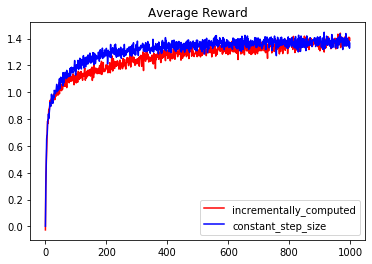

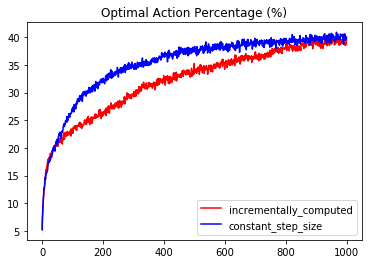

In [4]:
pylab.plot(range(0,n_Steps),Reward_Avg,'-r',label='incrementally_computed')
pylab.plot(range(0,n_Steps),Reward_Avg1,'-b',label='constant_step_size')
pylab.legend(loc='lower right')
pylab.title("Average Reward")
pylab.show()
pylab.figure()
pylab.plot(range(0,n_Steps),Optimal_Action_Percentage,'-r',label='incrementally_computed')
pylab.plot(range(0,n_Steps),Optimal_Action_Percentage1,'-b',label='constant_step_size')
pylab.legend(loc='lower right')
pylab.title("Optimal Action Percentage (%)")
pylab.show()

In [5]:
# Question 2 fig 2.3 for stationary


n_arms = 10

n_exp = 2000
n_Steps   = 1000

eps = 0.1
m=0
Reward_Avg = np.zeros((n_Steps,1))
Action_Sum = np.zeros((n_Steps, n_arms))
Optimal_Action = np.zeros((n_Steps,1))
Optimal_Action_Sum = np.zeros((n_Steps,1))
Optimal_Action_Index = np.zeros((n_exp,1))
Action_Record = np.zeros((n_exp,n_Steps))
for i in range(n_exp):
    #q= np.random.normal(0,1,n_arms)
    q= np.ones(n_arms,dtype = float)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype=float)
    Action_History = []
    Reward_History = []   
    for ts in range(n_Steps):
        Action = action(eps, n_arms, Q)
        Reward = reward(q, Action)
        if (m==0):
            update_Q_constantStepSize(Action, Reward, Q)
        else:
            update_Q_incrementallyComputed(Action, Reward, k, Q)
        update_q(q, n_arms)  
        Action_History.append(Action)
        Reward_History.append(Reward)



    Action_History1 = np.array(Action_History)   
    Reward_History1 = np.array(Reward_History) 
    Reward_Avg += Reward_History1

    Action_Record[i,:] = Action_History1 
    Optimal_Action_Index[i] = np.argmax(q)  
Reward_Avg /= np.float(n_exp)

for i in range(n_Steps):
    x = Action_Record[:,i] 
    count = 0
    for j in range(n_Steps):
        if (x[j]==Optimal_Action_Index[j]):
            count = count+1
    Optimal_Action[i] = count
Optimal_Action_Percentage = (Optimal_Action/np.float(n_exp))*100



n_arms = 10

n_exp = 2000
n_Steps   = 1000

eps = 0.1
m=1
Reward_Avg1 = np.zeros((n_Steps,1))
Action_Sum = np.zeros((n_Steps, n_arms))
Optimal_Action = np.zeros((n_Steps,1))
Optimal_Action_Sum = np.zeros((n_Steps,1))
Optimal_Action_Index = np.zeros((n_exp,1))
Action_Record = np.zeros((n_exp,n_Steps))
for i in range(n_exp):
    #q= np.random.normal(0,1,n_arms)
    q= np.ones(n_arms,dtype = float)
    k = np.zeros(n_arms,dtype = int)
    Q = np.zeros(n_arms,dtype=float)
    Action_History = []
    Reward_History = []   
    for ts in range(n_Steps):
        Action = action(eps, n_arms, Q)
        Reward = reward(q, Action)
        if (m==0):
            update_Q_constantStepSize(Action, Reward, Q)
        else:
            update_Q_incrementallyComputed(Action, Reward, k, Q)
        update_q(q, n_arms)  
        Action_History.append(Action)
        Reward_History.append(Reward)



    Action_History1 = np.array(Action_History)   
    Reward_History1 = np.array(Reward_History) 
    Reward_Avg1 += Reward_History1

    Action_Record[i,:] = Action_History1 
    Optimal_Action_Index[i] = np.argmax(q)  
Reward_Avg1 /= np.float(n_exp)

for i in range(n_Steps):
    x = Action_Record[:,i] 
    count = 0
    for j in range(n_Steps):
        if (x[j]==Optimal_Action_Index[j]):
            count = count+1
    Optimal_Action[i] = count
Optimal_Action_Percentage1 = (Optimal_Action/np.float(n_exp))*100



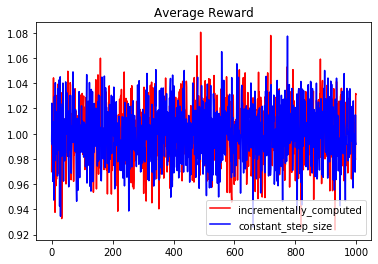

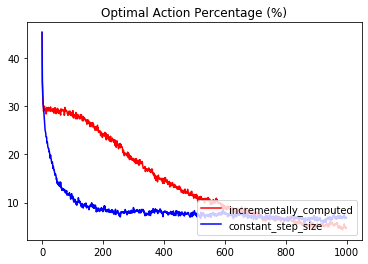

In [6]:
pylab.plot(range(0,n_Steps),Reward_Avg,'-r',label='incrementally_computed')
pylab.plot(range(0,n_Steps),Reward_Avg1,'-b',label='constant_step_size')
pylab.legend(loc='lower right')
pylab.title("Average Reward")
pylab.show()
pylab.figure()
pylab.plot(range(0,n_Steps),Optimal_Action_Percentage,'-r',label='incrementally_computed')
pylab.plot(range(0,n_Steps),Optimal_Action_Percentage1,'-b',label='constant_step_size')
pylab.legend(loc='lower right')
pylab.title("Optimal Action Percentage (%)")
pylab.show()